In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import math

from scipy.linalg import svdvals
from sklearn.preprocessing import normalize

from minsv import *
from errorbound import *
from gencorrup import *
from gennoise import *
from qrk1 import *
from qrk2 import *
from noisyRK import *
from thm25 import *
from thm24 import *

In [2]:
#Matrix dimensions
m = 20000
n = 100

A_t = np.random.randn(m,n)

#Create the solution equation
A_n = normalize(A_t)
x_t = np.random.randn(n,1)
b_t = np.dot(A_n,x_t)

x_1 = np.zeros((n,1))
x_1[0] = 1

#q = 0.8

e_0 = np.linalg.norm(-1*x_t)**2

In [3]:
qL = [0.5, 0.8, 0.9]
betaL = [0.00005, 0.0001, 0.001]
sdL = [0.0001, 0.01, 0.1]

In [4]:
#Corruption size + rate manipulation
#beta = 0.000006
#beta = 0.00005
csize = 10
num = 10000
iters = list(range(num))

#Noise parameters
mu = 0 #fixed
sig = 0.01
mu2 = sig*math.sqrt(2/np.pi)
sig2 = sig*math.sqrt(1-2/np.pi)
#noise_max = 0
sampsize = 10

In [5]:
#Compute sigma values

#sigmin = minSV2(A_n,q,beta)
#sigmin = (q-beta)*np.sqrt((q-beta)*m/n)
sigmax = np.linalg.svd(A_n,compute_uv=False).max()

In [6]:
#kacz experiment for 2.4
#_,_,kacz_experiment_qrk,_,N,NBS = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sig,num)

In [7]:
#errors,phi = error_bound_thm_2_4(A_n,x_t,q,beta,N,NBS,1,num)
#phi

In [8]:
def funcdata(q,beta,sd):
    noise_max = 0
    
    sigmin = (q-beta)*np.sqrt((q-beta)*m/n)
    kacz_experiment_qrk_avg = [0]*num
    errors24_avg = [0]*num
    for i in range(sampsize):
        _,_,kacz_experiment_qrk,noise_m_i,N,NBS = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sd,num)
        errors24,_ = error_bound_thm_2_4(A_n,x_t,q,beta,N,NBS,q,num)
        noise_max = max(noise_max,noise_m_i)
        kacz_experiment_qrk_avg = list(map(lambda x: x[0]+x[1], list(zip(kacz_experiment_qrk,kacz_experiment_qrk_avg))))
        errors24_avg = list(map(lambda x: x[0]+x[1], list(zip(errors24,errors24_avg))))
    kacz_experiment_qrk_avg = list(map(lambda x: x/sampsize, kacz_experiment_qrk_avg))
    errors24_avg = list(map(lambda x: x/sampsize, errors24_avg))
    
    return (kacz_experiment_qrk_avg, errors24_avg)

In [9]:
def plotgen(q,beta,sd):
#kacz experiment avg for 2.4
    noise_max = 0
    
    sigmin = (q-beta)*np.sqrt((q-beta)*m/n)
    kacz_experiment_qrk_avg = [0]*num
    errors24_avg = [0]*num
    for i in range(sampsize):
        _,_,kacz_experiment_qrk,noise_m_i,N,NBS = QuantileRK2(A_n,x_t,b_t,q,m,beta,csize,sd,num)
        errors24,_ = error_bound_thm_2_4(A_n,x_t,q,beta,N,NBS,q,num)
        noise_max = max(noise_max,noise_m_i)
        kacz_experiment_qrk_avg = list(map(lambda x: x[0]+x[1], list(zip(kacz_experiment_qrk,kacz_experiment_qrk_avg))))
        errors24_avg = list(map(lambda x: x[0]+x[1], list(zip(errors24,errors24_avg))))
    kacz_experiment_qrk_avg = list(map(lambda x: x/sampsize, kacz_experiment_qrk_avg))
    errors24_avg = list(map(lambda x: x/sampsize, errors24_avg))

    fig = plt.figure()

    plt.semilogy(iters,kacz_experiment_qrk_avg,'g-')
    plt.semilogy(iters,errors24_avg, 'r--')

    #plt.title(r"$20000 \times 100$ Matrix, $\mu = $, $\sigma = $")
    plt.rcParams.update({'font.size': 16})
    plt.tick_params(labelsize=16)
    plt.xlabel('$k$',{'size':18})
    plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
    plt.legend(['QRK','Theorem 2.4'],loc="upper right")
    fig.savefig('corruptedkaczplot/'+'q'+str(q)+'beta'+str(beta)+'sd'+str(sd)+'.png')
    fig.show()

In [10]:
def plotgen_agg(q_L,beta_L,sd_L,name):
    fig = plt.figure()
    markers = ['o','v','s']
    i=0
    
    for a in q_L:
        for b in beta_L:
            for c in sd_L:
                kaczexp,kaczbound = funcdata(a,b,c)
                plt.semilogy(iters,kaczexp,linestyle='-',marker=markers[i],color='b',markevery=1000)
                #[1,num/2,num-1]
                plt.semilogy(iters,kaczbound,linestyle='--',marker=markers[i],color='r',markevery=1000)
                i+=1
                
    plt.rcParams.update({'font.size': 16})
    plt.tick_params(labelsize=16)
    plt.xlabel('$k$',{'size':18})
    plt.ylabel('$||\mathbf{x}^{(k)} - \mathbf{x}^*||^2$',{'size':18})
    #plt.legend(['QRK','Theorem 2.4'],loc="upper right")
    #plt.legend([r'QRK $(q = 0.5)$',r'Theorem 1.4 $(q = 0.5)$',r'QRK $(q = 0.8)$',r'Theorem 1.4 $(q = 0.8)$',r'QRK $(q = 0.9)$',r'Theorem 1.4 $(q = 0.9)$'], loc='center left', bbox_to_anchor=(1, 0.5))
    plt.legend([r'QRK $(\beta = 0.00005)$',r'Theorem 1.4 $(\beta = 0.00005)$',r'QRK $(\beta = 0.0001)$',r'Theorem 1.4 $(\beta = 0.0001)$',r'QRK $(\beta = 0.001)$',r'Theorem 1.4 $(\beta = 0.001)$'], loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.legend([r'QRK $(sd = 0.0001)$',r'Theorem 1.4 $(sd = 0.0001)$',r'QRK $(sd = 0.01)$',r'Theorem 1.4 $(sd = 0.01)$',r'QRK $(sd = 0.1)$',r'Theorem 1.4 $(sd = 0.1)$'], loc='center left', bbox_to_anchor=(1, 0.5))
    fig.savefig(name, bbox_inches = "tight")
    fig.show()

[    0     1     2 ... 19995 19997 19999]
[14027]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[9850]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[11354]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[2446]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[13158]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[78]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[10179]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[742]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[428]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[15278]
[[    0     1     2 ... 19995 19997 19999]]
[    0     1     2 ... 19995 19997 19999]
[17242 17351]
[[    0     1

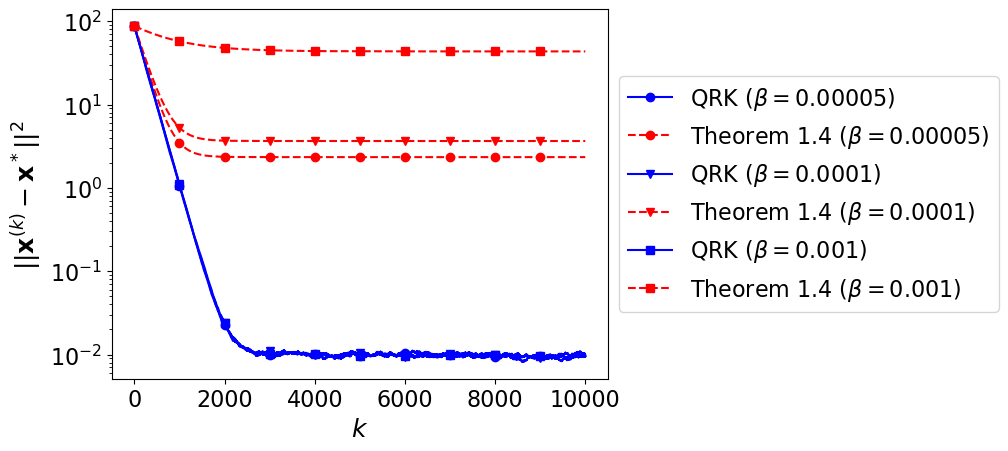

In [11]:
plotgen_agg(qL[1:2],betaL,sdL[1:2],'corruptedkaczplot/qrk_agg_beta.png')

In [12]:
noise_max

NameError: name 'noise_max' is not defined

In [ ]:
#Generate errors

errors1 = error_bound_crl_1(A_n,x_t,q,beta,noise_max,q,num)

In [ ]:
#errors2 = error_bound_crl_2(A_n,x_t,q,beta,mu,sig,mu2,sig2,q,num)

In [ ]:
errors3 = error_bound_crl_3(A_n,x_t,q,beta,sig,q,num)

In [ ]:
fig = plt.figure()

plt.semilogy(iters,kacz_experiment_qrk_avg,'g-')
plt.semilogy(iters,errors1, 'r--')
#plt.semilogy(iters,errors2, 'g--')
plt.semilogy(iters,errors3, 'b-.')

#plt.title(r"$20000 \times 100$ Matrix, $\mu = $, $\sigma = $")
plt.rcParams.update({'font.size': 16})
plt.tick_params(labelsize=16)
plt.xlabel('$k$',{'size':18})
plt.ylabel('$||\mathbf{x}_k - \mathbf{x}||^2$',{'size':18})
plt.legend(['QRK','Corollary 2.4.1', 'Corollary 2.4.3'],loc="upper right")
fig.show()